<a href="https://colab.research.google.com/github/Ingenjoy/Recommendation/blob/master/Day3/DAY03_02_surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-surprise

    100% |████████████████████████████████| 2.4MB 510kB/s 
    100% |████████████████████████████████| 184kB 4.7MB/s 
  Running setup.py bdist_wheel for scikit-surprise ... - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/99/99/d8/a5468fbc316324616dee7cb2ab0c4fe9671441b96130b67e87
Successfully built scikit-surprise


In [0]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
# verbose- If True, will print computed value. Default is True
cross_validate(algo, data, measures=['RMSE','MAE'], cv = 5, verbose =True)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /content/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9479  0.9312  0.9318  0.9466  0.9282  0.9371  0.0084  
MAE (testset)     0.7450  0.7322  0.7388  0.7463  0.7341  0.7393  0.0057  
Fit time          7.22    7.29    8.01    8.09    4.68    7.06    1.24    
Test time         0.32    0.43    0.40    0.40    0.17    0.34    0.10    


{'fit_time': (7.217419147491455,
  7.291917324066162,
  8.014441728591919,
  8.089263916015625,
  4.678488492965698),
 'test_mae': array([0.74501469, 0.7321643 , 0.738756  , 0.74630312, 0.7340656 ]),
 'test_rmse': array([0.94786786, 0.93116346, 0.93176565, 0.94658932, 0.92816847]),
 'test_time': (0.31679463386535645,
  0.43083691596984863,
  0.39502644538879395,
  0.4001905918121338,
  0.16584038734436035)}

In [0]:
!ls -la

total 40
drwxr-xr-x 1 root root 4096 Mar 30 00:12 .
drwxr-xr-x 1 root root 4096 Mar 30 00:07 ..
drwx------ 4 root root 4096 Mar 30 00:08 .cache
drwxr-xr-x 3 root root 4096 Mar 30 00:08 .config
drwxr-xr-x 1 root root 4096 Mar 13 21:48 datalab
drwxr-xr-x 4 root root 4096 Mar 30 00:08 .forever
drwxr-xr-x 5 root root 4096 Mar 30 00:08 .ipython
drwx------ 3 root root 4096 Mar 30 00:08 .local
-rw------- 1 root root 1024 Mar 30 00:08 .rnd
drwxr-xr-x 3 root root 4096 Mar 30 00:12 .surprise_data


In [0]:
!ls .surprise_data/ -la

total 12
drwxr-xr-x 3 root root 4096 Mar 30 00:12 .
drwxr-xr-x 1 root root 4096 Mar 30 00:12 ..
drwxr-xr-x 3 root root 4096 Mar 30 00:12 ml-100k


In [0]:
!ls .surprise_data/ml-100k/ml-100k/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [0]:
! cat .surprise_data/ml-100k/ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size = .25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9404


0.9404122775119118

In [0]:
from surprise import SVD
from surprise import Dataset

# Load the movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = SVD()
algo.fit(trainset)

In [0]:
uid = str(196)
iid = str(302)

pred = algo.predict(uid, iid, r_ui = 4, verbose = True)

user: 196        item: 302        r_ui = 4.00   est = 4.04   {'was_impossible': False}


In [0]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import os

file_path = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/u.data')

reader = Reader(line_format = 'user item rating timestamp', sep = '\t')

data = Dataset.load_from_file(file_path, reader = reader)

cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9428  0.9464  0.9403  0.9495  0.9408  0.9440  0.0035  
MAE (testset)     0.7466  0.7476  0.7459  0.7549  0.7466  0.7483  0.0033  
Fit time          0.05    0.05    0.06    0.05    0.05    0.05    0.00    
Test time         0.13    0.13    0.12    0.13    0.12    0.12    0.00    


{'fit_time': (0.050345659255981445,
  0.04594016075134277,
  0.0570063591003418,
  0.046537160873413086,
  0.046384334564208984),
 'test_mae': array([0.74660819, 0.74762947, 0.74586862, 0.75489822, 0.74661203]),
 'test_rmse': array([0.94283949, 0.9463786 , 0.94030932, 0.94946335, 0.94081829]),
 'test_time': (0.12512445449829102,
  0.12552666664123535,
  0.12202692031860352,
  0.12888193130493164,
  0.12279987335205078)}

In [0]:
import pandas as pd
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {'itemID' : [1, 1, 1, 2, 2],
               'userID' : [9, 32, 2, 45, 'user_foo'],
               'rating' : [3, 2, 4, 3,1]}
df = pd.DataFrame(ratings_dict)

In [0]:
df

,itemID,rating,userID
0,1,3,9
1,1,2,32
2,1,4,2
3,2,3,45
4,2,1,user_foo


In [0]:
reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

cross_validate(NormalPredictor(), data, cv=2)

{'fit_time': (0.0006055831909179688, 0.0006220340728759766),
 'test_mae': array([1.25044528, 0.05115786]),
 'test_rmse': array([1.41788106, 0.05780635]),
 'test_time': (0.00023651123046875, 0.00024437904357910156)}

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

data = Dataset.load_builtin('ml-100k')

kf = KFold(n_splits = 3)

algo = SVD()

for trainset, testset in kf.split(data):
  algo.fit(trainset)
  predictions = algo.test(testset)
  
  accuracy.rmse(predictions, verbose = True)

RMSE: 0.9436
RMSE: 0.9476
RMSE: 0.9476


In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import PredefinedKFold

# path to dataset folder
files_dir = os.path.expanduser('~/.surprise_data/ml-100k/ml-100k/')

# This time, we'll use the built-in reader.
reader = Reader('ml-100k')

In [0]:
# folds_files is a list of tuples containing file paths:
# [(u1.base, u1.test), (u2.base, u2.test), ... (u5.base, u5.test)]
train_file = files_dir + 'u%d.base'
test_file = files_dir + 'u%d.test'
folds_files = [(train_file % i, test_file % i) for i in (1, 2, 3, 4, 5)]

data = Dataset.load_from_folds(folds_files, reader=reader)
pkf = PredefinedKFold()

algo = SVD()
for trainset, testset in pkf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9536
RMSE: 0.9390
RMSE: 0.9345
RMSE: 0.9303
RMSE: 0.9307


In [0]:
train_file

'/content/.surprise_data/ml-100k/ml-100k/u%d.base'

In [0]:
folds_files

[('/content/.surprise_data/ml-100k/ml-100k/u1.base',
  '/content/.surprise_data/ml-100k/ml-100k/u1.test'),
 ('/content/.surprise_data/ml-100k/ml-100k/u2.base',
  '/content/.surprise_data/ml-100k/ml-100k/u2.test'),
 ('/content/.surprise_data/ml-100k/ml-100k/u3.base',
  '/content/.surprise_data/ml-100k/ml-100k/u3.test'),
 ('/content/.surprise_data/ml-100k/ml-100k/u4.base',
  '/content/.surprise_data/ml-100k/ml-100k/u4.test'),
 ('/content/.surprise_data/ml-100k/ml-100k/u5.base',
  '/content/.surprise_data/ml-100k/ml-100k/u5.test')]

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin('ml-100k')

param_grid = {'n_epochs' : [ 5,10], 'lr_all' : [0.002, 0.005],
             'reg_all' : [0.4, 0.6]}

gs =  GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 3)
gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

0.9638295236248613
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [0]:
algo = gs.best_estimator['rmse']
algo.fit(data.build_full_trainset())

In [0]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.01   {'was_impossible': False}


In [0]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [0]:
results_df

NameError: ignored

In [0]:
gs.cv_results

{'mean_fit_time': array([1.26184249, 1.75618442, 1.79030371, 1.7727774 , 3.50186173,
        3.49464226, 3.44442113, 3.61970552]),
 'mean_test_mae': array([0.80580135, 0.81456798, 0.78191513, 0.79259712, 0.78586491,
        0.79642946, 0.77254565, 0.78411679]),
 'mean_test_rmse': array([0.99727512, 1.00328863, 0.97383439, 0.98235198, 0.97806855,
        0.98618347, 0.96382952, 0.97347739]),
 'mean_test_time': array([0.49394019, 0.76668914, 0.62865798, 0.74526461, 0.62520075,
        0.73868839, 0.69353557, 0.66325251]),
 'param_lr_all': [0.002, 0.002, 0.005, 0.005, 0.002, 0.002, 0.005, 0.005],
 'param_n_epochs': [5, 5, 5, 5, 10, 10, 10, 10],
 'param_reg_all': [0.4, 0.6, 0.4, 0.6, 0.4, 0.6, 0.4, 0.6],
 'params': [{'lr_all': 0.002, 'n_epochs': 5, 'reg_all': 0.4},
  {'lr_all': 0.002, 'n_epochs': 5, 'reg_all': 0.6},
  {'lr_all': 0.005, 'n_epochs': 5, 'reg_all': 0.4},
  {'lr_all': 0.005, 'n_epochs': 5, 'reg_all': 0.6},
  {'lr_all': 0.002, 'n_epochs': 10, 'reg_all': 0.4},
  {'lr_all': 0.002,

In [0]:
from collections import defaultdict
from surprise import SVD
from surprise import Dataset

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
   # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])




196 ['408', '169', '178', '603', '657', '483', '12', '114', '318', '474']
186 ['318', '316', '133', '515', '427', '408', '498', '272', '132', '178']
22 ['64', '12', '100', '135', '150', '357', '475', '22', '156', '178']
244 ['275', '603', '408', '12', '479', '963', '921', '611', '427', '483']
166 ['50', '169', '172', '496', '408', '483', '181', '513', '251', '64']
298 ['408', '64', '272', '316', '114', '963', '480', '12', '515', '302']
115 ['483', '179', '276', '285', '175', '134', '316', '515', '474', '180']
253 ['169', '174', '178', '520', '313', '170', '515', '479', '136', '205']
305 ['515', '57', '603', '488', '114', '657', '611', '132', '185', '513']
6 ['179', '430', '1021', '654', '603', '114', '641', '657', '1449', '661']
62 ['169', '430', '185', '408', '197', '654', '187', '657', '480', '923']
286 ['498', '213', '661', '558', '488', '603', '615', '1449', '318', '513']
200 ['136', '272', '194', '181', '512', '178', '1194', '12', '434', '251']
210 ['169', '64', '318', '408', '513


779 ['357', '98', '483', '12', '427', '170', '1449', '408', '313', '169']
778 ['172', '64', '182', '50', '127', '483', '12', '316', '187', '199']
782 ['69', '318', '169', '22', '64', '528', '98', '192', '174', '191']
786 ['64', '408', '483', '603', '114', '427', '488', '480', '12', '513']
784 ['100', '408', '318', '480', '127', '427', '89', '169', '357', '98']
770 ['474', '98', '603', '515', '427', '480', '479', '272', '48', '483']
788 ['408', '488', '316', '169', '513', '1194', '313', '191', '1019', '515']
789 ['12', '114', '169', '98', '251', '408', '178', '89', '56', '187']
790 ['169', '178', '313', '272', '64', '513', '408', '302', '12', '603']
787 ['480', '64', '127', '316', '603', '474', '50', '483', '98', '513']
783 ['408', '357', '169', '12', '170', '178', '483', '427', '479', '165']
785 ['313', '169', '483', '64', '178', '199', '603', '272', '357', '127']
794 ['474', '408', '183', '199', '169', '114', '178', '357', '483', '12']
781 ['480', '12', '199', '357', '23', '511', '40

In [0]:
import pandas as pd
svd_df = pd.DataFrame.from_dict(algo.compute_similarities())

svd_df

Computing the msd similarity matrix...
Done computing similarity matrix.


,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.272727,0.272727,0.531250,0.058824,0.411765,0.285714,0.208333,0.422222,0.319149,...,0.000000,0.500000,0.625000,0.333333,0.291667,0.250000,0.535714,0.200000,0.166667,0.333333
1,0.272727,1.000000,0.209302,0.196429,0.300000,0.327273,0.194805,0.348485,0.220183,0.258824,...,0.291667,0.333333,0.219512,0.169811,0.333333,0.227273,0.294872,0.266667,0.275862,0.318182
2,0.272727,0.209302,1.000000,0.256281,0.307692,0.492063,0.678571,0.410714,0.295302,0.430380,...,0.500000,0.413793,0.666667,0.285714,0.322785,0.235294,0.319149,0.175258,0.500000,0.218750
3,0.531250,0.196429,0.256281,1.000000,0.500000,0.359375,0.310345,0.330189,0.311741,0.344086,...,0.178571,0.390625,0.230769,0.333333,0.328704,0.158416,0.319328,0.250000,0.400000,0.370370
4,0.058824,0.300000,0.307692,0.500000,1.000000,0.181818,0.000000,0.545455,0.233333,0.333333,...,0.285714,0.320000,0.222222,0.228571,0.000000,1.000000,0.212766,0.250000,0.250000,0.600000
5,0.411765,0.327273,0.492063,0.359375,0.181818,1.000000,0.305263,0.472973,0.361963,0.383495,...,0.400000,0.659091,0.500000,0.428571,0.379845,0.448276,0.400000,0.253012,0.375000,0.714286
6,0.285714,0.194805,0.678571,0.310345,0.000000,0.305263,1.000000,0.258427,0.301370,0.383929,...,0.178571,0.261538,0.230769,0.375000,0.313559,0.214286,0.315789,0.200000,0.666667,0.538462
7,0.208333,0.348485,0.410714,0.330189,0.545455,0.472973,0.258427,1.000000,0.294118,0.354610,...,0.400000,0.512195,0.333333,0.500000,0.417722,0.434783,0.558824,0.307692,0.307692,0.500000
8,0.422222,0.220183,0.295302,0.311741,0.233333,0.361963,0.301370,0.294118,1.000000,0.374532,...,0.357143,0.283186,0.411765,0.454545,0.254630,0.172840,0.423529,0.313725,0.473684,0.324324
9,0.319149,0.258824,0.430380,0.344086,0.333333,0.383495,0.383929,0.354610,0.374532,1.000000,...,0.500000,0.344828,0.315068,0.384615,0.335570,0.159091,0.353982,0.308642,0.380952,0.250000


In [0]:
import pandas as pd
# svd_df2 = pd.DataFrame.from_dict(algo.compute_baselines)

# svd_df2

print(algo.compute_baselines)

<bound method AlgoBase.compute_baselines of <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fa759d86a58>>


In [0]:
predictions

[Prediction(uid='196', iid='302', r_ui=3.52986, est=4.035849856427928, details={'was_impossible': False}),
 Prediction(uid='196', iid='377', r_ui=3.52986, est=2.6481061334597724, details={'was_impossible': False}),
 Prediction(uid='196', iid='51', r_ui=3.52986, est=3.324711766104209, details={'was_impossible': False}),
 Prediction(uid='196', iid='346', r_ui=3.52986, est=3.7017792232016973, details={'was_impossible': False}),
 Prediction(uid='196', iid='474', r_ui=3.52986, est=4.060352094519606, details={'was_impossible': False}),
 Prediction(uid='196', iid='265', r_ui=3.52986, est=4.016491507129781, details={'was_impossible': False}),
 Prediction(uid='196', iid='465', r_ui=3.52986, est=3.6897301083403464, details={'was_impossible': False}),
 Prediction(uid='196', iid='451', r_ui=3.52986, est=3.357407795932226, details={'was_impossible': False}),
 Prediction(uid='196', iid='86', r_ui=3.52986, est=3.861065235947453, details={'was_impossible': False}),
 Prediction(uid='196', iid='1014', r

In [0]:
from collections import defaultdict

from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])


        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

data = Dataset.load_builtin('ml-100k')
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))



    
        

0.8784022622834924
0.2580791804991469
0.870166136443973
0.26521078524803965
0.8846588900671606
0.2591444270837788
0.882448690728945
0.2619651594548653
0.8606496272630457
0.24878804985978206


In [0]:
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)
    # Precision and recall can then be averaged over all users
#     print(sum(prec for prec in precisions.values()) / len(precisions))
#     print(sum(rec for rec in recalls.values()) / len(recalls))
    print(precisions.values())
    print(sum(prec for prec in precisions.values()))
    print(len(precisions))
    print(sum(prec for prec in precisions.values()) / len(precisions))
    break

dict_values([0.6666666666666666, 0.8, 1.0, 0.5, 0.8, 0.8, 1, 0.6666666666666666, 0.6, 1.0, 1.0, 0.4, 1.0, 0.6, 1, 1.0, 1.0, 1.0, 0.0, 0.6, 1.0, 1.0, 1, 0.8, 1.0, 0.8, 1.0, 1.0, 1, 0.8, 1.0, 0.8, 0.8, 1, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1, 0.8, 1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1, 0.8, 1.0, 1.0, 0.8, 1, 1.0, 1.0, 1, 1.0, 0.8, 0.8, 0.8, 0.75, 0.8, 1, 1.0, 0.6, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 0.0, 1, 0.8, 0.4, 0.8, 0.8, 0.8, 1, 0.6, 1.0, 1, 1, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1.0, 1.0, 1.0, 1, 1.0, 1.0, 1, 0.8, 1.0, 0.8, 0.6666666666666666, 0.3333333333333333, 0.0, 1, 1.0, 1.0, 1.0, 1.0, 1, 0.8, 1, 1, 0.6, 0.6, 1, 0.6, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 0.8, 1.0, 1.0, 1, 1, 1.0, 1.0, 1, 1.0, 0.8, 1.0, 1.0, 1, 0.8, 1, 0.6666666666666666, 0.6666666666666666, 1, 1.0, 1.0, 0.5, 1.0, 1.0, 1, 1.0, 0.8, 1.0, 0.8, 1.0, 1, 1.0, 1.0, 0.8, 1, 1.0, 1.0, 1, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.6, 0.8, 0.6, 1, 1.0, 0.6, 0.6, 0.8, 0.6, 1, 0.8, 0.8, 1

In [0]:
import io

from surprise import KNNBaseline
from surprise import Dataset
from surprise import get_dataset_dir

def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]
    return rid_to_name, name_to_rid
# First, train the algortihm to compute the similarities between items
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)

# Read the mappings raw id <-> movie name
rid_to_name, name_to_rid = read_item_names()

# Retrieve inner id of the movie Toy Story
toy_story_raw_id = name_to_rid['Toy Story (1995)']
toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

# Retrieve inner ids of the nearest neighbors of Toy Story.
toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k=10)  
# Convert inner ids of the neighbors into names.
toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id)
                       for inner_id in toy_story_neighbors)
toy_story_neighbors = (rid_to_name[rid]
                       for rid in toy_story_neighbors)

print()
print('The 10 nearest neighbors of Toy Story are:')
for movie in toy_story_neighbors:
    print(movie)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

The 10 nearest neighbors of Toy Story are:
Beauty and the Beast (1991)
Raiders of the Lost Ark (1981)
That Thing You Do! (1996)
Lion King, The (1994)
Craft, The (1996)
Liar Liar (1997)
Aladdin (1992)
Cool Hand Luke (1967)
Winnie the Pooh and the Blustery Day (1968)
Indiana Jones and the Last Crusade (1989)


In [0]:
! head .surprise_data/ml-100k/ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [0]:
import os

from surprise import SVD
from surprise import Dataset
from surprise import dump


data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

algo = SVD()
algo.fit(trainset)

# Compute predictions of the 'original' algorithm.
predictions = algo.test(trainset.build_testset())

# Dump algorithm and reload it.
file_name = os.path.expanduser('~/dump_file')
dump.dump(file_name, algo=algo)
_, loaded_algo = dump.load(file_name)

# We now ensure that the algo is still the same by checking the predictions.
predictions_loaded_algo = loaded_algo.test(trainset.build_testset())
assert predictions == predictions_loaded_algo
print('Predictions are the same')





Predictions are the same


In [0]:
!li

/bin/sh: 1: li: not found


In [0]:
!ls

datalab  dump_file


In [0]:
n_factors 

import random

from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import GridSearchCV


# Load the full dataset.
data = Dataset.load_builtin('ml-100k')
raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# Select your best algo with grid search.
print('Grid Search...')
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

algo = grid_search.best_estimator['rmse']

# retrain on the whole set A
trainset = data.build_full_trainset()
algo.fit(trainset)

# Compute biased accuracy on A
predictions = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

# Compute unbiased accuracy on B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)



Grid Search...
Biased accuracy on A,   RMSE: 0.8369
Unbiased accuracy on B, RMSE: 0.9378


0.9378079453476204

In [0]:
from __future__ import (absolute_import, division, print_function,             
                        unicode_literals)                                      
import pickle
import os

import pandas as pd

from surprise import SVD
from surprise import KNNBasic
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise import dump
from surprise.accuracy import rmse

# We will train and test on the u1.base and u1.test files of the movielens-100k dataset.
# if you haven't already, you need to download the movielens-100k dataset
# You can do it manually, or by running:

#Dataset.load_builtin('ml-100k')
# Now, let's load the dataset
train_file = os.path.expanduser('~') + '/.surprise_data/ml-100k/ml-100k/u1.base'
test_file = os.path.expanduser('~') + '/.surprise_data/ml-100k/ml-100k/u1.test'
data = Dataset.load_from_folds([(train_file, test_file)], Reader('ml-100k'))
              
# We'll use the well-known SVD algorithm and a basic nearest neighbors approach.
algo_svd = SVD()                                                       
algo_knn = KNNBasic()

for trainset, testset in data.folds(): 
    algo_svd.train(trainset)                             
    predictions_svd = algo_svd.test(testset)
    
    algo_knn.train(trainset)
    predictions_knn = algo_knn.test(testset)
    
    rmse(predictions_svd)
    rmse(predictions_knn)                                                                           
    
    dump.dump('./dump_SVD', predictions_svd, algo_svd)
    dump.dump('./dump_KNN', predictions_knn, algo_knn)

# 실행







/usr/local/lib/python3.6/dist-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)
/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9514
RMSE: 0.9889


In [0]:
# The dumps have been saved and we can now use them whenever we want.
predictions_svd, algo_svd = dump.load('./dump_SVD')
predictions_knn, algo_knn = dump.load('./dump_KNN')

df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_knn = pd.DataFrame(predictions_knn, columns=['uid', 'iid', 'rui', 'est', 'details'])    

df_svd['err'] = abs(df_svd.est - df_svd.rui)
df_knn['err'] = abs(df_knn.est - df_knn.rui)
# 실행


In [0]:

df_svd.head()
# 실행



,uid,iid,rui,est,details,err
0,1,6,5.0,3.303579,{'was_impossible': False},1.696421
1,1,10,3.0,4.009371,{'was_impossible': False},1.009371
2,1,12,5.0,4.525862,{'was_impossible': False},0.474138
3,1,14,5.0,3.907357,{'was_impossible': False},1.092643
4,1,17,3.0,3.060305,{'was_impossible': False},0.060305


In [0]:

df_knn.head()
# 실행


,uid,iid,rui,est,details,err
0,1,6,5.0,3.468613,"{'actual_k': 20, 'was_impossible': False}",1.531387
1,1,10,3.0,3.866290,"{'actual_k': 40, 'was_impossible': False}",0.866290
2,1,12,5.0,4.538194,"{'actual_k': 40, 'was_impossible': False}",0.461806
3,1,14,5.0,4.235741,"{'actual_k': 40, 'was_impossible': False}",0.764259
4,1,17,3.0,3.228002,"{'actual_k': 40, 'was_impossible': False}",0.228002


In [0]:

# Let's check how good are the KNN predictions when the SVD has a huge error:
df_knn[df_svd.err >= 3.5]
# 실행


,uid,iid,rui,est,details,err
1912,38,257,1.0,3.989741,"{'actual_k': 40, 'was_impossible': False}",2.989741
1925,38,432,1.0,4.064878,"{'actual_k': 40, 'was_impossible': False}",3.064878
7390,167,169,1.0,4.664991,"{'actual_k': 40, 'was_impossible': False}",3.664991
13972,295,183,1.0,4.202611,"{'actual_k': 40, 'was_impossible': False}",3.202611
15286,312,144,1.0,4.217120,"{'actual_k': 40, 'was_impossible': False}",3.217120
15306,312,265,1.0,4.131875,"{'actual_k': 40, 'was_impossible': False}",3.131875
19140,405,575,5.0,2.410506,"{'actual_k': 36, 'was_impossible': False}",2.589494


In [0]:

# Now, let's look at the predictions of SVD on the 10 worst predictions for KNN
df_svd.iloc[df_knn.sort_values(by='err')[-10:].index]
# 실행 

,uid,iid,rui,est,details,err
9406,208,302,1.0,4.350269,{'was_impossible': False},3.350269
19089,405,169,1.0,2.631513,{'was_impossible': False},1.631513
19785,436,132,1.0,3.994005,{'was_impossible': False},2.994005
157,2,315,1.0,4.191495,{'was_impossible': False},3.191495
8503,193,56,1.0,3.878791,{'was_impossible': False},2.878791
5531,113,976,5.0,3.173472,{'was_impossible': False},1.826528
7917,181,408,1.0,2.622765,{'was_impossible': False},1.622765
7390,167,169,1.0,4.637518,{'was_impossible': False},3.637518
7412,167,1306,5.0,3.553125,{'was_impossible': False},1.446875
5553,114,1104,5.0,3.202187,{'was_impossible': False},1.797813


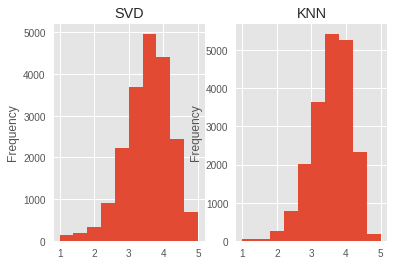

In [0]:
#@title 기본 제목 텍스트
# How different are the predictions from both algorithms ?
# Let's count the number of predictions for each rating value
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(1, 2)
df_svd.est.plot(kind='hist', title='SVD', ax=ax1)
df_knn.est.plot(kind='hist', title='KNN', ax=ax2)
# As expected, one of the drawbacks of the NN algorithms is that their predictions are often
# quite concentrated around the mean. The SVD algorithm seems more comfortable predicting extreme rating values.
# 실행



In [0]:
# Question: when a user has rated only a small number of items (less than 10), which algorithm
# gives the best predictions on average?

def get_Iu(uid):
    """Return the number of items rated by given user
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
df_knn['Iu'] = df_knn.uid.apply(get_Iu)
df_svd['Iu'] = df_svd.uid.apply(get_Iu)

df_knn[df_knn.Iu < 10].err.mean(), df_svd[df_svd.Iu < 10].err.mean()

(1.0382962702232326, 0.9885457196627477)

In [0]:
df_knn.Iu

0        135
1        135
2        135
3        135
4        135
5        135
6        135
7        135
8        135
9        135
10       135
11       135
12       135
13       135
14       135
15       135
16       135
17       135
18       135
19       135
20       135
21       135
22       135
23       135
24       135
25       135
26       135
27       135
28       135
29       135
        ... 
19970    225
19971    225
19972    225
19973    225
19974    225
19975    225
19976    225
19977    184
19978    184
19979    184
19980    184
19981    184
19982    213
19983    213
19984    213
19985    213
19986    269
19987    269
19988    269
19989    269
19990    269
19991    269
19992    269
19993    269
19994    180
19995    180
19996    180
19997    117
19998     67
19999     32
Name: Iu, Length: 20000, dtype: int64

In [0]:
df_knn[df_knn.Iu < 10]

,uid,iid,rui,est,details,err,Iu
1855,36,268,2.0,3.972171,"{'actual_k': 40, 'was_impossible': False}",1.972171,9
1856,36,269,3.0,3.828783,"{'actual_k': 40, 'was_impossible': False}",0.828783,9
1857,36,307,4.0,3.684946,"{'actual_k': 40, 'was_impossible': False}",0.315054,9
1858,36,310,4.0,3.611628,"{'actual_k': 40, 'was_impossible': False}",0.388372,9
1859,36,319,2.0,3.174730,"{'actual_k': 40, 'was_impossible': False}",1.174730,9
1860,36,339,5.0,3.392800,"{'actual_k': 33, 'was_impossible': False}",1.607200,9
1861,36,682,1.0,3.313243,"{'actual_k': 40, 'was_impossible': False}",2.313243,9
1862,36,748,4.0,3.078777,"{'actual_k': 40, 'was_impossible': False}",0.921223,9
1863,36,882,5.0,3.763344,"{'actual_k': 21, 'was_impossible': False}",1.236656,9
1864,36,883,5.0,2.781930,"{'actual_k': 9, 'was_impossible': False}",2.218070,9


In [0]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy


# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {'itemID' : [1, 2, 3,1,2,3,1,2,3,1,2,3,4,5,4,5,4,5,1,3,5],
               'userID' : [1,1,1,2,2,2,3,3,3,4,4,4,5,5,6,6,7,7,8,8,8],
               'rating' : [1,1,1,3,3,3,4,4,4,5,5,5,4,4,5,5,2,2,4,3,2]}
df = pd.DataFrame(ratings_dict)

In [0]:
df

,itemID,rating,userID
0,1,1,1
1,2,1,1
2,3,1,1
3,1,3,2
4,2,3,2
5,3,3,2
6,1,4,3
7,2,4,3
8,3,4,3
9,1,5,4


In [0]:

reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


In [0]:
data

In [0]:
# We'll use the famous SVD algorithm.
algo = SVD()

kf = KFold(n_splits = 3)

trainset = data.build_full_trainset()
algo.fit(trainset)

predictions = algo.test(testset)
 accuracy.rmse(predictions, verbose = True)

# for trainset, testset in kf.split(data):
#   algo.fit(trainset)
#   predictions = algo.test(testset)
  
#   accuracy.rmse(predictions, verbose = True)

IndentationError: ignored

In [0]:
predictions

[Prediction(uid=2, iid=2, r_ui=3.0, est=3.121714300134049, details={'was_impossible': False}),
 Prediction(uid=1, iid=2, r_ui=1.0, est=2.426623945945276, details={'was_impossible': False}),
 Prediction(uid=2, iid=3, r_ui=3.0, est=3.2403192797758296, details={'was_impossible': False}),
 Prediction(uid=4, iid=1, r_ui=5.0, est=4.1274665461425, details={'was_impossible': False}),
 Prediction(uid=3, iid=1, r_ui=4.0, est=3.607162833637722, details={'was_impossible': False}),
 Prediction(uid=8, iid=3, r_ui=3.0, est=3.323726143513138, details={'was_impossible': False}),
 Prediction(uid=7, iid=4, r_ui=2.0, est=2.979333517139681, details={'was_impossible': False})]

In [0]:
algo.estimate

<bound method SVD.estimate of <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f8769b0a8d0>>

In [0]:
import pandas as pd
svd_df = pd.DataFrame.from_dict(algo.compute_similarities())

svd_df

Computing the msd similarity matrix...
Done computing similarity matrix.


,0,1,2,3,4,5,6,7
0,1.000000,0.200000,0.100000,0.058824,0.0,0.0,0.0,0.133333
1,0.200000,1.000000,0.500000,0.200000,0.0,0.0,0.0,0.666667
2,0.100000,0.500000,1.000000,0.500000,0.0,0.0,0.0,0.666667
3,0.058824,0.200000,0.500000,1.000000,0.0,0.0,0.0,0.285714
4,0.000000,0.000000,0.000000,0.000000,1.0,0.5,0.2,0.200000
5,0.000000,0.000000,0.000000,0.000000,0.5,1.0,0.1,0.100000
6,0.000000,0.000000,0.000000,0.000000,0.2,0.1,1.0,1.000000
7,0.133333,0.666667,0.666667,0.285714,0.2,0.1,1.0,1.000000


In [0]:
algo.predict('8','2',None,verbose=True)

user: 8          item: 2          r_ui = None   est = 3.33   {'was_impossible': False}


Prediction(uid='8', iid='2', r_ui=None, est=3.3333333333333335, details={'was_impossible': False})

In [0]:
algo.predict('8','4',None,verbose=True)

user: 8          item: 4          r_ui = None   est = 3.33   {'was_impossible': False}


Prediction(uid='8', iid='4', r_ui=None, est=3.3333333333333335, details={'was_impossible': False})

In [0]:
from surprise.model_selection import GridSearchCV

# data = Dataset.load_builtin('ml-100k')
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

param_grid = {'n_epochs' : [ 5,10], 'lr_all' : [0.002, 0.005],
             'reg_all' : [0.4, 0.6],
              'n_factors' : [2]
             
             }
      


gs =  GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 3)
gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

algo = gs.best_estimator['rmse']
algo.fit(data.build_full_trainset())

1.3951245339623342
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6, 'n_factors': 2}


In [0]:
algo.predict('8','4',None,verbose=True)

user: 8          item: 4          r_ui = None   est = 3.33   {'was_impossible': False}


Prediction(uid='8', iid='4', r_ui=None, est=3.3333333333333335, details={'was_impossible': False})

In [0]:
algo.predict('8','5',None,verbose=True)

user: 8          item: 5          r_ui = None   est = 3.33   {'was_impossible': False}


Prediction(uid='8', iid='5', r_ui=None, est=3.3333333333333335, details={'was_impossible': False})

In [0]:
algo.bi

array([ 0.01935624, -0.01075057, -0.02299156,  0.04142008, -0.01637159])

In [0]:
algo.bu

array([-0.31156314, -0.04257206,  0.09217661,  0.22589704,  0.06118074,
        0.15420174, -0.12508616, -0.04489938])

In [0]:
algo.pu

array([[-0.11410817, -0.03021098],
       [ 0.05219034,  0.0370985 ],
       [ 0.06893408,  0.0427489 ],
       [ 0.04257668, -0.07044466],
       [ 0.00651747,  0.11676199],
       [ 0.00022968,  0.03564785],
       [-0.05000675,  0.11997051],
       [ 0.02406363,  0.16071917]])

In [0]:
algo.qi

array([[ 0.02907553,  0.02557265],
       [-0.00779067, -0.14403091],
       [ 0.01627954,  0.03277076],
       [ 0.12263031,  0.05428845],
       [-0.07781121, -0.09294382]])

In [0]:
algo.get_neighbors

<bound method AlgoBase.get_neighbors of <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f8769a9d2e8>>

SVD 테스트

In [0]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

reader = Reader(rating_scale=(1,5))



# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {'itemID' : [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,3,5],
               'userID' :  [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,8],
               'rating' :  [1,1,1,0,0,3,3,3,0,0,4,4,4,0,0,5,5,5,0,0,0,0,0,4,4,0,0,0,5,5,0,0,0,2,2,4,3,2]}
df = pd.DataFrame(ratings_dict)

data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)


In [0]:
bsl_options = {'n_factors': '5',
               'n_epochs': 2,
               'reg_u': 12,
               'reg_i': 5,
               'verbose' : True,
               'biased' : False
               }

algo = SVD(n_factors = 2, verbose = True,n_epochs=1, biased = True)
algo.fit(data.build_full_trainset())

Processing epoch 0


In [0]:
pred = algo.predict('8','4',r_ui=4, verbose=True)

user: 8          item: 4          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
pred = algo.predict('8','2',r_ui=4, verbose=True)

user: 8          item: 2          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
pred = algo.predict('8','5',r_ui=4, verbose=True)

user: 8          item: 5          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
pred = algo.predict('8','1',r_ui=4, verbose=True)

user: 8          item: 1          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
pred = algo.predict('8','3',r_ui=4, verbose=True)

user: 8          item: 3          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
pred = algo.predict('8','5',r_ui=4, verbose=True)

user: 8          item: 5          r_ui = 4.00   est = 1.84   {'was_impossible': False}


In [0]:
import pandas as pd
svd_df = pd.DataFrame.from_dict(algo.compute_similarities())

svd_df

Computing the msd similarity matrix...
Done computing similarity matrix.


,0,1,2,3,4,5,6,7
0,1.000000,0.294118,0.156250,0.094340,0.125000,0.086207,0.312500,0.150000
1,0.294118,1.000000,0.625000,0.294118,0.078125,0.060976,0.125000,0.375000
2,0.156250,0.625000,1.000000,0.625000,0.058824,0.048544,0.081967,0.375000
3,0.094340,0.294118,0.625000,1.000000,0.044643,0.038462,0.056818,0.250000
4,0.125000,0.078125,0.058824,0.044643,1.000000,0.714286,0.384615,0.093750
5,0.086207,0.060976,0.048544,0.038462,0.714286,1.000000,0.217391,0.081081
6,0.312500,0.125000,0.081967,0.056818,0.384615,0.217391,1.000000,0.107143
7,0.150000,0.375000,0.375000,0.250000,0.093750,0.081081,0.107143,1.000000
